## PyTorch Tensor Slicing and Concatenation

In [2]:
import torch
from IPython.display import Image

## Slicing and Concatenation

### Indexing and Slicing

Prepare target tensor.

In [4]:
x = torch.FloatTensor([[[1, 2],
                        [3, 4]],
                       [[5, 6],
                        [7, 8]],
                       [[9, 10],
                        [11, 12]]])
print(x.size())

torch.Size([3, 2, 2])


Access to certain dimension.

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])


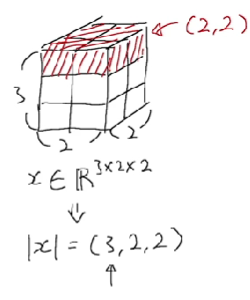

In [6]:
print(x[0]) #첫번째 차원 불러오기
print(x[0, :])
print(x[0, :, :])

Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\9.png")

In [4]:
print(x[-1])
print(x[-1, :])
print(x[-1, :, :])

tensor([[ 9., 10.],
        [11., 12.]])
tensor([[ 9., 10.],
        [11., 12.]])
tensor([[ 9., 10.],
        [11., 12.]])


In [5]:
print(x[:, 0, :]) #x의 사이즈는 (3,2,2)인데 첫번째, 3번째 차원 다 가져오고 두번째는 0으로 만드니깐 차원줄어들은 (3,2)임

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])


Access by range. Note that the number of dimensions would not be changed.
범위로 가져오는거는 차원 안바뀜

torch.Size([2, 2, 2])
torch.Size([3, 1, 2])
torch.Size([3, 1, 2])


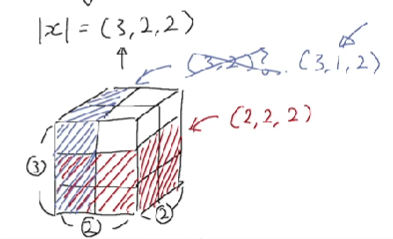

In [7]:
print(x[1:3, :, :].size()) #첫번째 차원의 2번째 요소부터 3번째전까지 가져오라는 뜻 = 그림에서 빨간색 부분
print(x[:, :1, :].size()) # range의 특징은 차원이 변하지않는다. ([3,2])가 아니라 ([3,1,2])임
print(x[:, :-1, :].size()) #마지막에서 전까지. 위에랑 똑같은 조건임
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\10.png")

### split: Split tensor to desirable shapes
= 숫자로 쪼개기.

In [7]:
x = torch.FloatTensor(10, 4)

torch.Size([3, 2, 2])


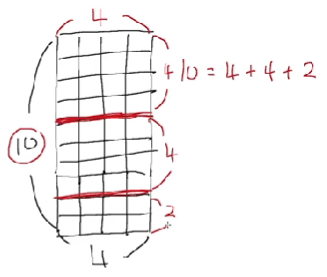

In [8]:
splits = x.split(4, dim=0) #0번 dimension이 숫자 4가 되도록 쪼개줘. 남은거는 니가 알아서 잘챙겨
#0번 dimension은 행. (왼쪽).그림에서 10에 해당하는부분이 dim = 0

for s in splits:
    print(s.size())
    
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\11.png")
    

### chunk: Split tensor to number of chunks.
= 개수로 쪼개기

In [9]:
x = torch.FloatTensor(8, 4) 

In [10]:
chunks = x.chunk(3, dim=0) #8을 3개로 쪼갤려면 8 = 3+3+2 이로 쪼갠다

for c in chunks:
    print(c.size())

torch.Size([3, 4])
torch.Size([3, 4])
torch.Size([2, 4])


### index_select: Select elements by using dimension index.

torch.Size([3, 2, 2])


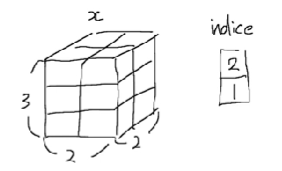

In [9]:
x = torch.FloatTensor([[[1, 1],
                        [2, 2]],
                       [[3, 3],
                        [4, 4]],
                       [[5, 5],
                        [6, 6]]])
#0번째 차원에다가 indice의 2,1를 순서대로 가져와서 합쳐놓은 텐서를 return 해  

indice = torch.LongTensor([2, 1])#인덱스는 정수니깐 어떤 인덱스를 담아놓을 longtensor을 하나 만든다.


# 계산을 하기 위한 데이터들에는 FloatTensor를 사용하고 Int형 숫자를 사용할 때는 LongTensor 사용함
print(x.size())

Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\12.png")

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])
torch.Size([2, 2, 2])


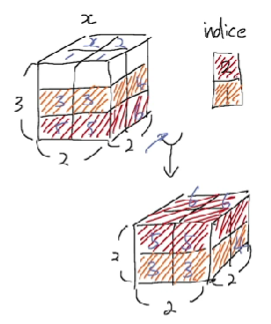

In [10]:
y = x.index_select(dim=0, index=indice) 
#x에다가 index_select 하고싶은데 0번 dimension에다가 indice의 2하고 1를 순서대로 가져와서 합쳐놓은 tensor를 return 해

print(y)
print(y.size())

Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\13.png")

### cat: Concatenation of multiple tensors in the list.

In [16]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])
y = torch.FloatTensor([[10, 11, 12],
                       [13, 14, 15],
                       [16, 17, 18]])

print(x.size(), y.size())

torch.Size([3, 3]) torch.Size([3, 3])


tensor([[[1., 1.],
         [2., 2.]],

        [[3., 3.],
         [4., 4.]],

        [[5., 5.],
         [6., 6.]],

        [[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])
torch.Size([5, 2, 2])


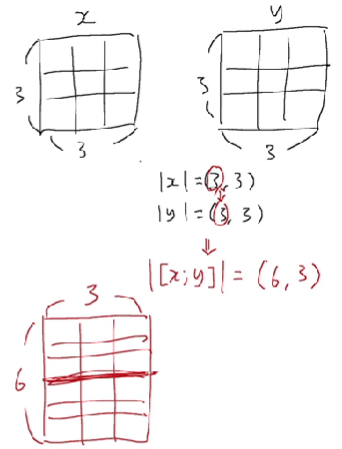

In [15]:
z = torch.cat([x, y], dim=0) #torch.cat[리스트, 붙이고싶은거], dim = 붙이고싶은 dimension
# x=([3,3]), y=({3,3}) 에서 0번째 dimension은 첫번째인 3이다.

print(z)
print(z.size())
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\14.png")

tensor([[ 1.,  2.,  3., 10., 11., 12.],
        [ 4.,  5.,  6., 13., 14., 15.],
        [ 7.,  8.,  9., 16., 17., 18.]])
torch.Size([3, 6])


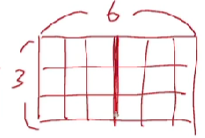

In [18]:
z = torch.cat([x, y], dim=-1)

print(z)
print(z.size())
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\15.png")

### stack: Stacking of multiple tensors in the list.
= 쌓기. 즉 위로 쌓으니깐 차원이 하나 더 생김

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])
torch.Size([2, 3, 3])


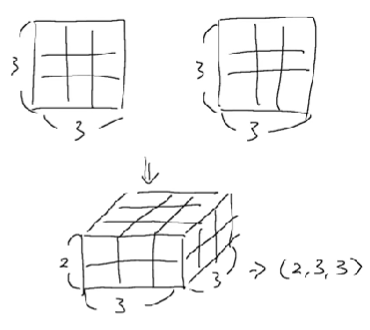

In [20]:
z = torch.stack([x, y])
print(z)
print(z.size())

Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\16.png")

Cat하고 Stack의 차이는 cat은 존재하는 dimension에 붙이는데 stack은 내가 원하는 dimension에 unsqueeze하고 붙인다.

Or you can specify the dimension. Default is 0.

In [17]:
z = torch.stack([x, y], dim=-1)
print(z)
print(z.size())

tensor([[[ 1., 10.],
         [ 2., 11.],
         [ 3., 12.]],

        [[ 4., 13.],
         [ 5., 14.],
         [ 6., 15.]],

        [[ 7., 16.],
         [ 8., 17.],
         [ 9., 18.]]])
torch.Size([3, 3, 2])


### Implement 'stack' function by using 'cat'.

In [18]:
# z = torch.stack([x, y])
z = torch.cat([x.unsqueeze(0), y.unsqueeze(0)], dim=0)
print(z)
print(z.size())

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])
torch.Size([2, 3, 3])


### Useful Trick: Merge results from iterations

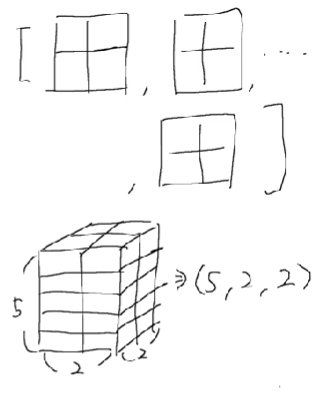

In [21]:
result = []
for i in range(5):
    x = torch.FloatTensor(2, 2)
    result += [x] #x 리스트가 result에 하나씩 추가되는것
    
#결과값으로 2X2 행렬이 5개가 리스트로 만들어진다.
#5개 행렬을 stack함수를 통해서 쌓이면 사진과 같은 형태의 tensor가 만들어진다

result = torch.stack(result) #result에 담아있는 x배열들을 stack함수로 쌓아올린다.
result.size()

Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\17.png")